In [2]:
# linear Regression only for Regression
# logistic Regression only for Classification

In [3]:
# import basic library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',30)

In [4]:
df=pd.read_csv('cardio_vascular.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [7]:
df.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
# please do the the basic preprocessing , EDA as per requarement

In [11]:
# model building process---classsification--binary class

In [10]:
X=df.drop(['heart_disease'],axis=1)# independent variable
Y=df['heart_disease']# dependent varible

In [15]:
# scaling is requared for logistic regression

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)# transform independent variable

In [13]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)# conver array format to dataframe format
X_scaled.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


In [16]:
corr_matrix=X_scaled.corr(method='spearman')# use spearman for imballanced data

In [17]:
corr_matrix

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
age,1.000000,-0.105859,-0.092161,0.280046,0.203287,0.110856,-0.149565,-0.383572,0.077391,0.264582,-0.180474,0.339660,0.088443
gender,-0.105859,1.000000,-0.053450,-0.071923,-0.152997,0.027200,-0.044169,-0.046480,0.139157,0.090896,-0.020843,0.113834,0.241115
rest_cp,-0.092161,-0.053450,1.000000,0.025526,-0.092239,0.073738,0.066715,0.335338,-0.427933,-0.195285,0.169307,-0.217002,-0.212186
rest_bp,0.280046,-0.071923,0.025526,1.000000,0.127010,0.152272,-0.137273,-0.027979,0.043791,0.146722,-0.081828,0.091323,0.058995
cholesterol,0.203287,-0.152997,-0.092239,0.127010,1.000000,0.034139,-0.163354,-0.053430,0.088895,0.057102,-0.026660,0.114584,0.084941
fast_bloodsugar,0.110856,0.027200,0.073738,0.152272,0.034139,1.000000,-0.101709,-0.016838,0.049261,0.032542,-0.048340,0.138197,-0.013372
rest_ecg,-0.149565,-0.044169,0.066715,-0.137273,-0.163354,-0.101709,1.000000,0.092661,-0.073428,-0.075213,0.109506,-0.108580,-0.017285
stress_HR,-0.383572,-0.046480,0.335338,-0.027979,-0.053430,-0.016838,0.092661,1.000000,-0.403849,-0.438630,0.443005,-0.253116,-0.158123
Exercise_cp,0.077391,0.139157,-0.427933,0.043791,0.088895,0.049261,-0.073428,-0.403849,1.000000,0.322149,-0.282593,0.158985,0.240512
STdepression_Exerc,0.264582,0.090896,-0.195285,0.146722,0.057102,0.032542,-0.075213,-0.438630,0.322149,1.000000,-0.594413,0.230183,0.253489


<AxesSubplot:>

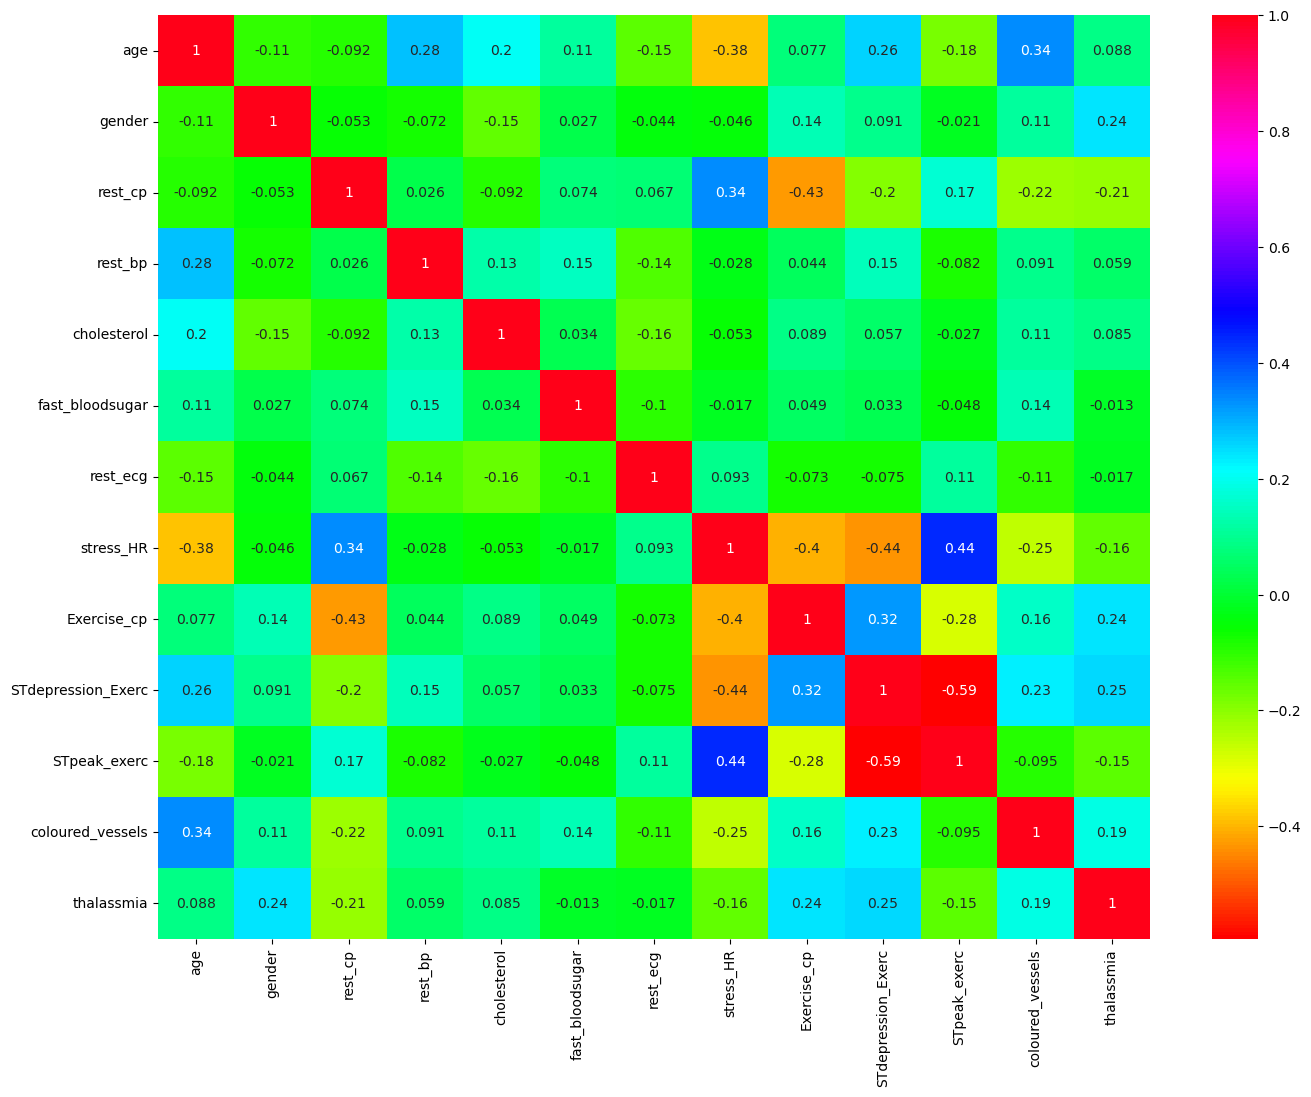

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix,annot=True,cmap='hsv')

In [26]:
# we dont have any multicollinearity

In [27]:
# split the data into train and test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)


In [24]:
X_train.shape

(820, 13)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_mod=LogisticRegression()

In [27]:
# logistic regression.. to train the model

In [28]:
log_mod.fit(X_train,Y_train)

LogisticRegression()

In [39]:
# training is complete

In [40]:
# checking the performance

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [43]:
#check the training performance

In [32]:
Y_train_predict=log_mod.predict(X_train)

In [33]:
accuracy_score(Y_train,Y_train_predict)

0.8536585365853658

In [34]:
confusion_matrix(Y_train,Y_train_predict)

array([[323,  76],
       [ 44, 377]])

In [35]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       399
           1       0.83      0.90      0.86       421

    accuracy                           0.85       820
   macro avg       0.86      0.85      0.85       820
weighted avg       0.86      0.85      0.85       820



In [36]:
#check for the test data

In [37]:
Y_predict_test=log_mod.predict(X_test)

In [38]:
accuracy_score(Y_test,Y_predict_test)

0.8390243902439024

In [39]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       100
           1       0.80      0.91      0.85       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



In [40]:
Y_test

472     1
29      0
122     0
173     1
36      1
       ..
711     0
669     0
1021    0
805     1
689     1
Name: heart_disease, Length: 205, dtype: int64

In [41]:
Y_predict_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1])

In [42]:
Y_train

198     1
918     0
77      0
32      0
82      0
       ..
1017    0
905     0
961     1
465     1
723     1
Name: heart_disease, Length: 820, dtype: int64

In [43]:
Y_train_predict

array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [61]:
# to find the probability score

In [44]:
probability_score=log_mod.predict_proba(X_test)

In [45]:
probability_score

array([[0.18847004, 0.81152996],
       [0.81585432, 0.18414568],
       [0.99114467, 0.00885533],
       [0.00555395, 0.99444605],
       [0.43607326, 0.56392674],
       [0.93008494, 0.06991506],
       [0.53455938, 0.46544062],
       [0.5230626 , 0.4769374 ],
       [0.07518298, 0.92481702],
       [0.65581728, 0.34418272],
       [0.33915224, 0.66084776],
       [0.91798681, 0.08201319],
       [0.5230626 , 0.4769374 ],
       [0.99114467, 0.00885533],
       [0.33203899, 0.66796101],
       [0.59992818, 0.40007182],
       [0.05383537, 0.94616463],
       [0.95355248, 0.04644752],
       [0.06497209, 0.93502791],
       [0.24914974, 0.75085026],
       [0.0594941 , 0.9405059 ],
       [0.61737056, 0.38262944],
       [0.19816158, 0.80183842],
       [0.53455938, 0.46544062],
       [0.08825692, 0.91174308],
       [0.13903554, 0.86096446],
       [0.3880346 , 0.6119654 ],
       [0.18121598, 0.81878402],
       [0.01392414, 0.98607586],
       [0.9937028 , 0.0062972 ],
       [0.

In [49]:
X_test_new=X_test.copy()


In [50]:
X_test_new['Y_predicted']=Y_predict_test

In [54]:
X_test_new["Actul_Y"]=Y_test


In [55]:
pd.set_option('display.max_rows',100)

In [53]:
X_test_new.head(100)

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,Y_predicted,Actul_y
472,0.604167,0.0,0.000000,0.339623,0.162100,0.0,0.5,0.458015,0.0,0.096774,0.5,0.00,0.666667,1,1
29,0.541667,0.0,0.000000,0.811321,0.458904,0.0,1.0,0.351145,1.0,0.548387,0.5,0.00,0.666667,0,0
122,0.645833,1.0,0.000000,0.481132,0.356164,0.0,0.0,0.541985,1.0,0.451613,0.5,0.50,1.000000,0,0
173,0.208333,0.0,0.666667,0.000000,0.166667,0.0,0.5,0.824427,0.0,0.000000,1.0,0.00,0.666667,1,1
36,0.458333,1.0,1.000000,0.292453,0.198630,0.0,0.0,0.412214,1.0,0.225806,1.0,0.25,0.666667,1,1
199,0.437500,1.0,0.000000,0.471698,0.168950,0.0,0.0,0.419847,1.0,0.145161,0.5,0.00,1.000000,0,0
337,0.520833,1.0,0.666667,0.292453,0.335616,0.0,0.0,0.618321,0.0,0.080645,0.0,0.25,0.666667,0,1
430,0.791667,1.0,0.666667,0.547170,0.196347,0.0,0.0,0.603053,0.0,0.129032,0.5,0.00,1.000000,0,0
769,0.875000,0.0,0.666667,0.150943,0.317352,1.0,0.0,0.450382,0.0,0.000000,1.0,0.25,0.666667,1,1
694,0.208333,1.0,0.000000,0.226415,0.212329,0.0,0.5,0.526718,0.0,0.193548,0.5,0.00,1.000000,0,0
